In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import re
#imputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('cleaned_data.csv')
data['User-Country'].describe()

count             25730
unique               76
top       United States
freq              20554
Name: User-Country, dtype: object

In [3]:
data['User-ID'] = data['User-ID'].astype(str)
data['Genre'] = data['Genre'].astype(str)
data['Book-Rating'] = data['Book-Rating'].astype(float)
data['User-Age'] = data['User-Age'].astype(int)

# User Interaction Features
# Count of Books Read per Genre
genre_counts = data.pivot_table(index='User-ID', columns='Genre', values='ISBN', aggfunc='count', fill_value=0)

# Average Rating per Genre
average_ratings = data.pivot_table(index='User-ID', columns='Genre', values='Book-Rating', aggfunc='mean', fill_value=0)

# Variability in Ratings per Genre
std_dev_ratings = data.pivot_table(index='User-ID', columns='Genre', values='Book-Rating', aggfunc='std', fill_value=0)

# Combine these features into a single DataFrame
user_features = genre_counts.join(average_ratings, rsuffix='_avg').join(std_dev_ratings, rsuffix='_std')

#add the age column from the original data to user_features
user_features = user_features.join(data[['User-ID', 'User-Age']].set_index('User-ID'))

#add the User-Country column from the original data to user_features
user_features = user_features.join(data[['User-ID', 'User-Country']].set_index('User-ID'))

# Example output
user_features.head(100)

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Fiction_std,Historical Fiction_std,Horror_std,Legal Thriller_std,Mystery_std,Romance_std,Science Fiction_std,Thriller_std,User-Age,User-Country
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100264,0,2,0,0,0,3,1,0,1,0.0,...,2.12132,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States
100264,0,2,0,0,0,3,1,0,1,0.0,...,2.12132,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States
100264,0,2,0,0,0,3,1,0,1,0.0,...,2.12132,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States


In [4]:
import pandas as pd

# Assuming 'User-Age' is already in your DataFrame
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
user_features['Age Group'] = pd.cut(user_features['User-Age'], bins=bins, labels=labels, right=False)
user_features.head(100)

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Historical Fiction_std,Horror_std,Legal Thriller_std,Mystery_std,Romance_std,Science Fiction_std,Thriller_std,User-Age,User-Country,Age Group
User-ID,,,,,,,,,,,,,,,,,,,,,
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
100004,3,0,0,0,0,0,0,0,0,10.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,33,United States,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100264,0,2,0,0,0,3,1,0,1,0.0,...,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States,35-45
100264,0,2,0,0,0,3,1,0,1,0.0,...,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States,35-45
100264,0,2,0,0,0,3,1,0,1,0.0,...,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,37,United States,35-45


#### Downmsampling Age Group

In [5]:
# Assuming 'User-Age' is already categorized
age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)
# Calculate the target size, for example, the median size of the age groups
target_size = age_group_counts.median()

# Separate the overrepresented group from the rest
overrepresented = user_features[user_features['Age Group'] == '25-35']
other_groups = user_features[user_features['Age Group'] != '25-35']

# Downsample the overrepresented group
downsampled = overrepresented.sample(n=int(target_size), random_state=42)

balanced_user_features = pd.concat([downsampled, other_groups], ignore_index=True)
user_features = pd.concat([downsampled, other_groups], ignore_index=True)

# Assuming 'User-Age' is already categorized
age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)

Age Group
25-35    81964
35-45    24052
45-55    18527
18-25    12145
<18       3396
55-65     3065
65+        960
Name: count, dtype: int64
Age Group
35-45    24052
45-55    18527
18-25    12145
25-35    12145
<18       3396
55-65     3065
65+        960
Name: count, dtype: int64


In [6]:
age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)

Age Group
35-45    24052
45-55    18527
18-25    12145
25-35    12145
<18       3396
55-65     3065
65+        960
Name: count, dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

# Numeric columns: Impute with median
numeric_columns = user_features.select_dtypes(include=['int64', 'float64']).columns
numeric_imputer = SimpleImputer(strategy='median')
user_features[numeric_columns] = numeric_imputer.fit_transform(user_features[numeric_columns])

# Categorical columns: Impute with the most frequent value
categorical_columns = user_features.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
user_features[categorical_columns] = categorical_imputer.fit_transform(user_features[categorical_columns])

In [8]:
age_group_counts = user_features['Age Group'].value_counts()
print(age_group_counts)

Age Group
35-45    24052
45-55    18527
18-25    12145
25-35    12145
<18       3396
55-65     3065
65+        960
Name: count, dtype: int64


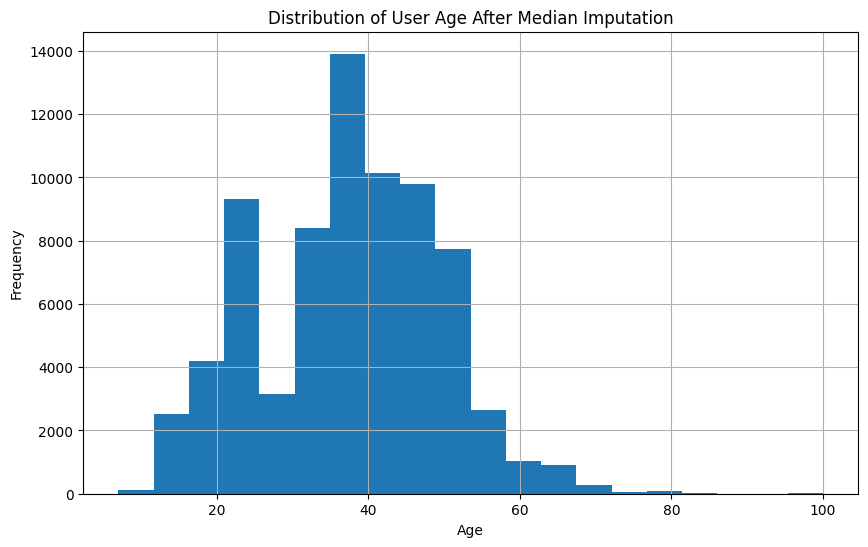

In [9]:
# Plot the distribution of the age data after imputation
plt.figure(figsize=(10, 6))
user_features['User-Age'].hist(bins=20)
plt.title('Distribution of User Age After Median Imputation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# One-hot encoding for country
country_dummies = pd.get_dummies(user_features['User-Country'], prefix='Country')
# One-hot encoding for age group
age_dummies = pd.get_dummies(user_features['Age Group'], prefix='Age')
# Dropping the original columns
user_features.drop(['User-Country', 'Age Group'], axis=1, inplace=True)

# Adding these to the main DataFrame
user_features = pd.concat([user_features, country_dummies], axis=1)
user_features = pd.concat([user_features, age_dummies], axis=1)

user_features.head(100)

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Country_Uruguay,Country_Venezuela,Country_Yugoslavia,Age_<18,Age_18-25,Age_25-35,Age_35-45,Age_45-55,Age_55-65,Age_65+
0,7.0,2.0,0.0,11.0,5.0,0.0,0.0,0.0,9.0,8.571429,...,False,False,False,False,False,True,False,False,False,False
1,9.0,2.0,0.0,10.0,4.0,0.0,0.0,0.0,8.0,6.111111,...,False,False,False,False,False,True,False,False,False,False
2,3.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,...,False,False,False,False,False,True,False,False,False,False
3,14.0,3.0,3.0,1.0,0.0,0.0,3.0,6.0,2.0,10.000000,...,False,False,False,False,False,True,False,False,False,False
4,0.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.000000,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,...,False,False,False,False,False,True,False,False,False,False
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,False,False,False,False,False,True,False,False,False,False
97,1.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,1.0,7.000000,...,False,False,False,False,False,True,False,False,False,False
98,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,8.833333,...,False,False,False,False,False,True,False,False,False,False


In [11]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = user_features.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Combine scaled numerical features back with categorical
scaled_features = pd.concat([pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns, index=numerical_features.index), user_features.select_dtypes(include=['uint8', 'category'])], axis=1)

In [12]:
from sklearn.cluster import KMeans
# Apply K-means clustering
kmeans = KMeans(n_clusters=7)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_features)
user_features['Cluster'] = clusters
cluster_profiles = user_features.groupby('Cluster').mean()
print(cluster_profiles.head())

          Fantasy    Fiction  Historical Fiction    Horror  Legal Thriller  \
Cluster                                                                      
0        2.000000  19.000000            6.000000  0.000000        3.000000   
1        8.397083   1.377859            0.558502  0.324163        0.059662   
2        2.249879   3.566513            0.589656  0.147184        0.080079   
3        4.327591   2.792209            0.362142  0.411177        2.050015   
4        3.581724   0.085541            0.243657  0.159856        0.103222   

          Mystery   Romance  Science Fiction  Thriller  Fantasy_avg  ...  \
Cluster                                                              ...   
0        3.000000  6.000000         1.000000  6.000000     8.500000  ...   
1        0.364601  0.165065         3.075240  0.769307     8.000285  ...   
2        0.253430  0.431909         0.177427  0.540916     5.295719  ...   
3        1.784868  0.767936         0.413918  4.416365     6.916143  ... 

In [13]:
# Group by cluster and calculate mean for numerical features and mode for categorical features
cluster_summary = user_features.groupby('Cluster').agg({**{col: 'mean' for col in user_features.columns if user_features[col].dtype != 'object'},
                                                       **{col: lambda x: x.mode()[0] if not x.mode().empty else np.nan for col in user_features.columns if user_features[col].dtype == 'object'}})
cluster_summary

,Fantasy,Fiction,Historical Fiction,Horror,Legal Thriller,Mystery,Romance,Science Fiction,Thriller,Fantasy_avg,...,Country_Venezuela,Country_Yugoslavia,Age_<18,Age_18-25,Age_25-35,Age_35-45,Age_45-55,Age_55-65,Age_65+,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.000000,19.000000,6.000000,0.000000,3.000000,3.000000,6.000000,1.000000,6.000000,8.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
1,8.397083,1.377859,0.558502,0.324163,0.059662,0.364601,0.165065,3.075240,0.769307,8.000285,...,0.000000,0.000000,0.033146,0.057673,0.247265,0.365595,0.296321,0.000000,0.000000,1.0
2,2.249879,3.566513,0.589656,0.147184,0.080079,0.253430,0.431909,0.177427,0.540916,5.295719,...,0.000000,0.000000,0.033268,0.177076,0.148192,0.392505,0.162788,0.068288,0.017883,2.0
3,4.327591,2.792209,0.362142,0.411177,2.050015,1.784868,0.767936,0.413918,4.416365,6.916143,...,0.000000,0.000000,0.088088,0.058432,0.170402,0.360967,0.288049,0.030537,0.003524,3.0
4,3.581724,0.085541,0.243657,0.159856,0.103222,0.501235,0.223619,0.243545,0.479513,6.129268,...,0.000168,0.000056,0.090480,0.211776,0.135777,0.305568,0.167939,0.067075,0.020880,4.0
5,8.335523,2.284776,1.533585,4.086714,0.629003,0.399409,0.392511,1.630481,2.730005,8.417682,...,0.000000,0.000000,0.004106,0.462309,0.220890,0.015438,0.297257,0.000000,0.000000,5.0
6,8.123886,5.062066,1.216044,0.677570,0.267234,3.292747,1.552212,1.261918,1.851746,8.396078,...,0.000000,0.000000,0.000000,0.061003,0.205495,0.389893,0.331834,0.000000,0.011775,6.0


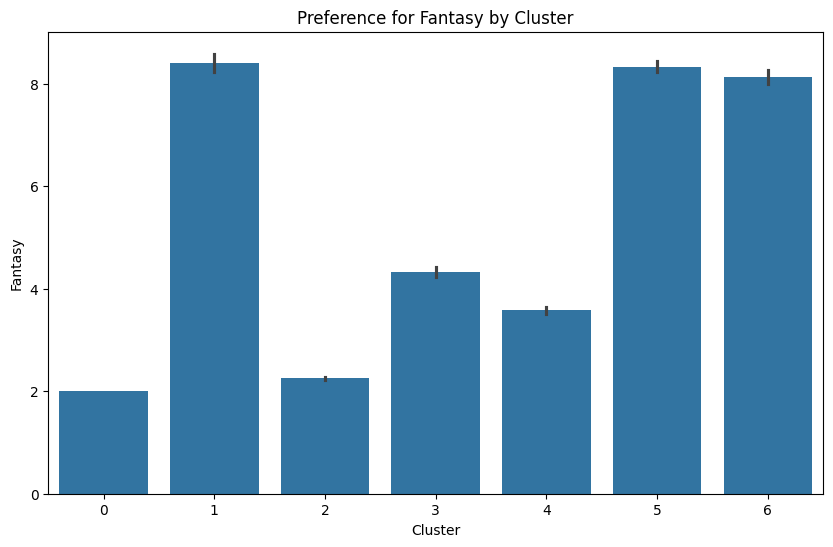

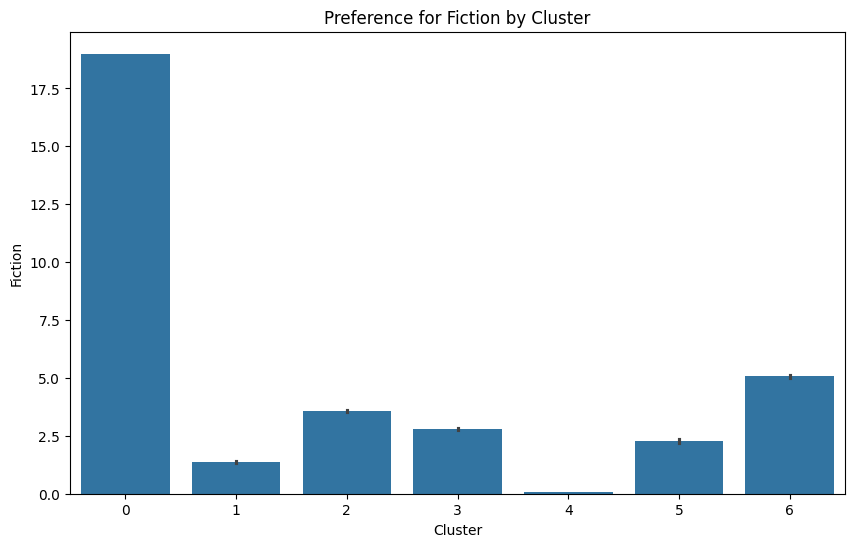

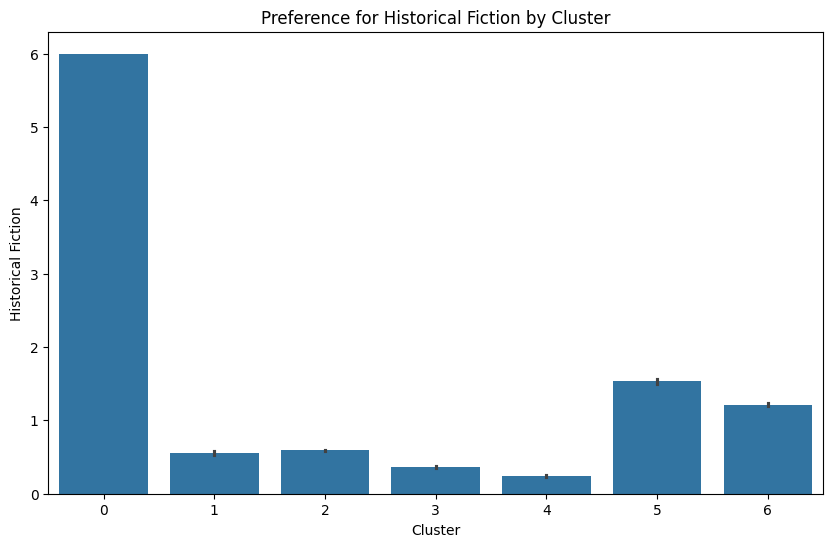

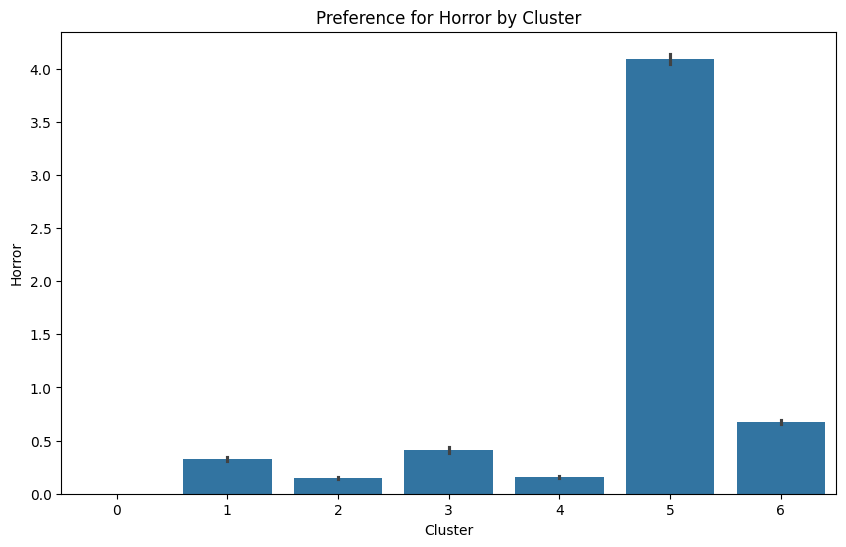

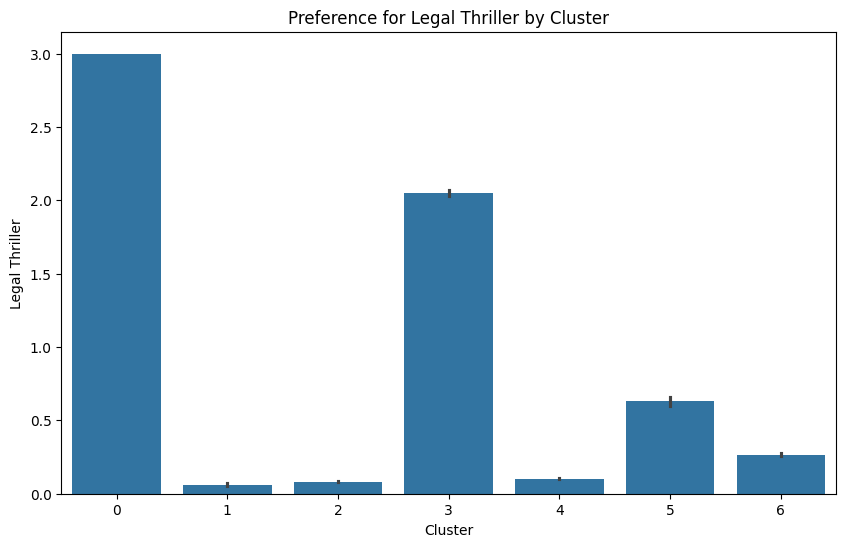

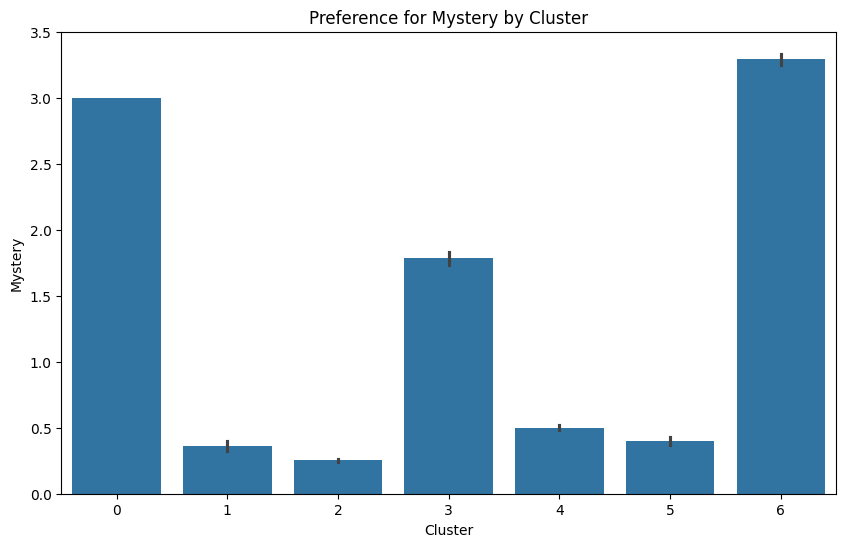

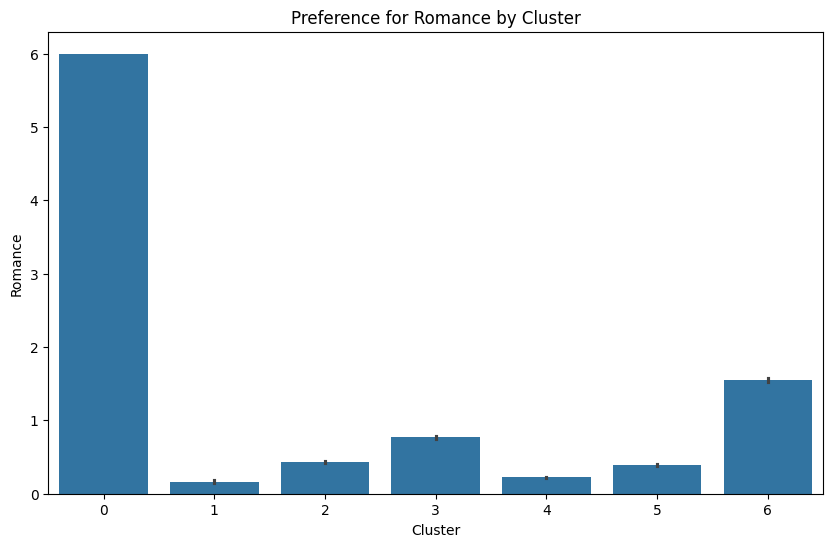

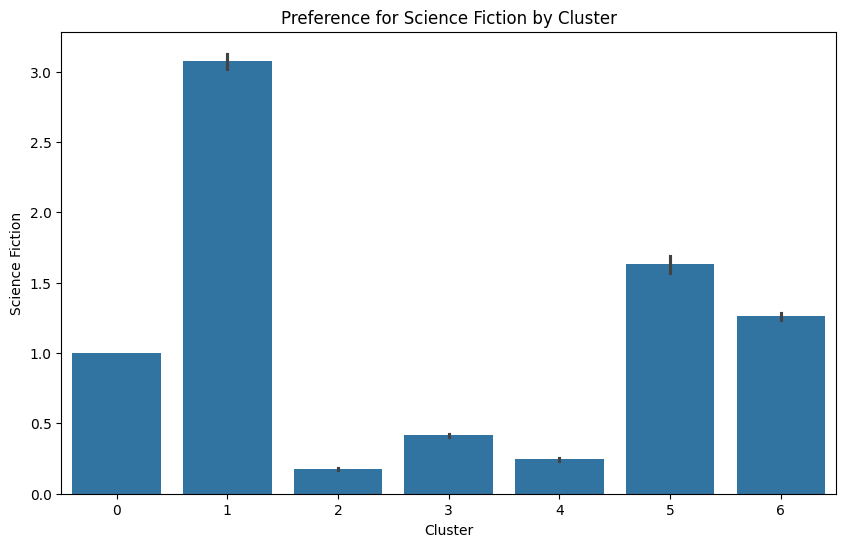

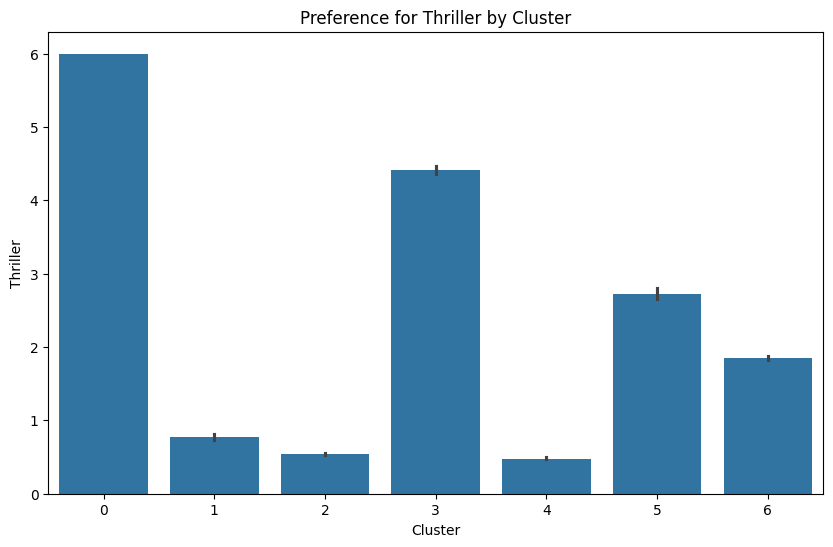

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#extracting genre columns
genre_columns = [col for col in cluster_summary.columns]
genre_columns = genre_columns[0:9]

# Visualization of genre preferences per cluster
for genre in genre_columns:  # assuming genre_columns is a list of all your genre dummy columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Cluster', y=genre, data=user_features)
    plt.title(f'Preference for {genre} by Cluster')
    plt.show()